<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Ejercicio de clasificación con redes neuronales profundas (DNN)

Ejemplo de clasificación utilizando redes neuronales para la clasificación de imagenes<br>

v1.1

In [1]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import keras
from keras.models import Sequential
#from keras.utils import to_categorical  
from keras.utils.np_utils import to_categorical # Si esto no funciona, probar con el import anterior

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [2]:
from keras.datasets import fashion_mnist

# Leer el dataset de mnist
(data_X_train, data_y_train), (data_X_test, data_y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


### `Fashion MNIST dataset`:
El dataset **`Fashion MNIST`** contiene 70.000 imagenes de categorías de ropa (remeras, zapatillas, pantalones). Cada imagen es de 28x28 píxeles en escala de grises (1 canal o 1 nivel de profundidad). Es uno de los dataset más utilizados para poner a prueba algoritmos de clasificación de imagenes.<br> [Dataset source](https://keras.io/api/datasets/fashion_mnist/)
- La entrada (X) es una variable imagen de 28x28
- La salida (y) es el la posible categoría de ropa que pertenece la imagen:

    - 0 -> T-shirt/top (remera de manga corta)
    - 1	-> Trouser (pantalón)
    - 2	-> Pullover (pulover)
    - 3	-> Dress (vestido)
    - 4	-> Coat (saco)
    - 5	-> Sandal (sandalia)
    - 6	-> Shirt (remera de manga larga)
    - 7	-> Sneaker (zapatilla)
    - 8	-> Bag (bolso)
    - 9	-> Ankle boot (bota)


In [3]:
category_list = ["remera_corta", "pantalon", "pulover", "vestido", "saco", "sandal",
                 "remera_larga", "zapatilla", "bolso", "bota"]

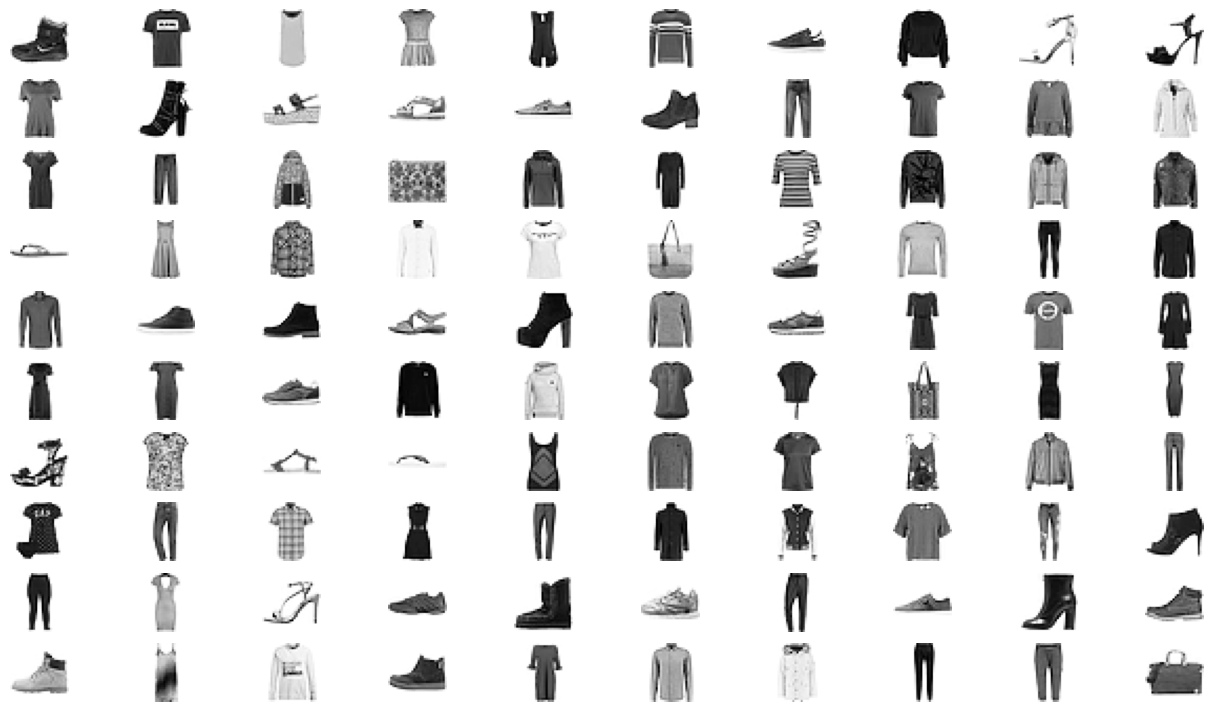

In [4]:
# Visualizar las 100 primeras imagenes
fig = plt.figure(figsize=(16,9))
for i in range(100):
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    plt.imshow(data_X_train[i], cmap='Greys')
plt.show()

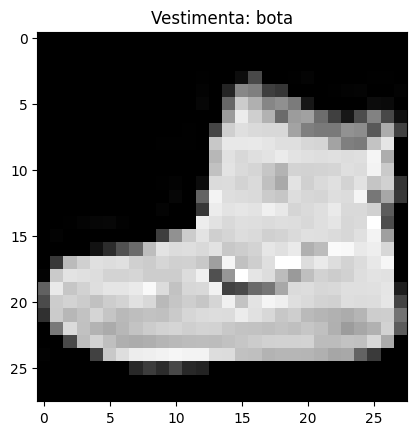

In [5]:
# Alumno, dibuje la primera imagen y su correspondiente categoria


plt.imshow(data_X_train[0], cmap='gray')

plt.title("Vestimenta: " + category_list[data_y_train[0]])

plt.show()

# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [6]:
# Alumno: Observar como está representada la imagen, ver fila del medio (14)

print(data_X_train[0][14, :])

[  0   0   1   4   6   7   2   0   0   0   0   0 237 226 217 223 222 219
 222 221 216 223 229 215 218 255  77   0]


In [7]:
# Alumno: Normalizar los datos entre 0 y 1

X_train_norm = data_X_train / 255
X_test_norm = data_X_test / 255

In [8]:
# Alumno: Imprimir la cantidad de datos en observacion (cantidad de imagenes)

print(" La cantidad de datos en observacion es :", X_train_norm.shape[0])

 La cantidad de datos en observacion es : 60000


In [9]:
# Alumno: Imprimir la dimension de la imagen

print("Tamaño de la 1ra imagen:", X_train_norm[0].shape)

Tamaño de la 1ra imagen: (28, 28)


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

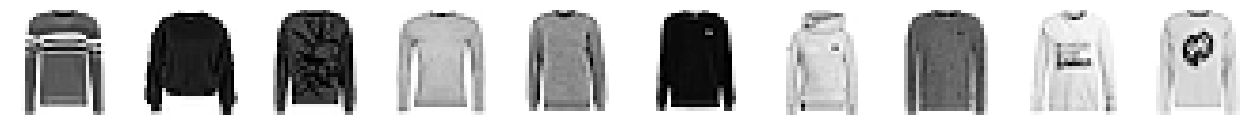

In [10]:
# Alumno: Explorar los primeros diez puloveres del dataset de train


fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):

    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')

    while True:
        if data_y_train[j] == 2:
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break         
        j += 1
plt.show()

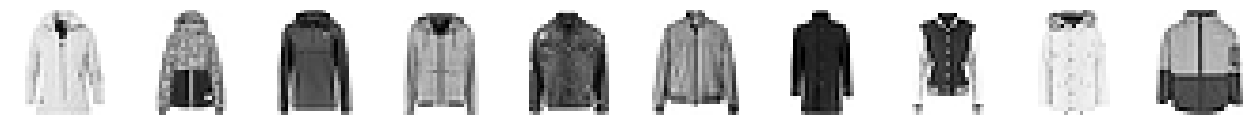

In [11]:
# Alumno: Explorar los primeros diez sacos del dataset de train

fig = plt.figure(figsize=(16,9))
j = 0

for i in range(10):

    ax = fig.add_subplot(1, 10, i+1)
    ax.axis('off')

    while True:
        if data_y_train[j] == 4:
            ax.imshow(X_train_norm[j], cmap='Greys')
            j += 1
            break         
        j += 1
plt.show()

Se puede ver que los puloveres y los sacos son muy similares, salvo que los sacos tiene botones o cierre

#### Transformar los imagenes de 28x28 (2 dimensiones) en un array de una dimensión (28x28 = 784)
Esto se realiza porque las redes neuronales no soportan que se ingrese un array de dos dimensiones, solo soportan ingresar "N" features (un array)

In [12]:
# Alumno: Transformar el espacio de variable 28x28 a un vector de 784
# proceso de flatten --> transformar las imagenes en un vector de 1 dimension

num_pixels = X_train_norm.shape[1] * X_train_norm.shape[2]

X_train = X_train_norm.reshape(X_train_norm.shape[0], num_pixels).astype('float32')
X_test = X_test_norm.reshape(X_test_norm.shape[0], num_pixels).astype('float32')

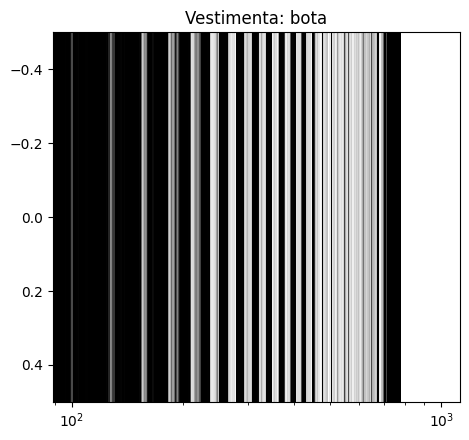

In [13]:
# Alumno: ¿Cómo se ve ahora nuestra primera imagen?

fig = plt.figure()
ax = fig.add_subplot()

# Muestra la primer imagen de X_train con un ajuste .reshape(-1,1) y con escala de grises
ax.imshow(X_train[0].reshape(-1,1).T, cmap='gray')

# Escala de números en el eje de las x como potencia de base 10
ax.set_xscale("log")

# Agrega titulo
plt.title("Vestimenta: " + category_list[data_y_train[0]])

# Muetra la imagen
plt.show()

In [14]:
print('Datos en observacion:', X_train.shape)

Datos en observacion: (60000, 784)


Son 60000 vectores, cada vector representa lo mismo que una fila de un dataset. Cada fila o vector tiene 784 columnas

In [15]:
print('Dimensión de cada imagen faltten:', X_train[0].shape)

Dimensión de cada imagen faltten: (784,)


# Entrenar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline4.png" width="1000" align="middle">

Los datos ya estan dividios en train y test

In [16]:
# Alumno: Transformar la salida a oneHotEncoding con to_categorical
# tanto para data_y_train como para data_y_test

y_train = to_categorical(data_y_train)
y_test = to_categorical(data_y_test)


In [17]:
# input shape
in_shape = X_train.shape[1]
in_shape

784

In [18]:
# output shape
out_shape = y_train.shape[1]
out_shape

10

In [22]:
from keras.layers import Dense, Dropout

# Alumno, crear un modelo con la cantidad de capas ocultas que crea
# mejor sin regularizacion


model = Sequential()


model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 130,058
Trainable params: 130,058
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 4s 4ms/step - loss: 0.5876 - accuracy: 0.7949 - val_loss: 0.4708 - val_accuracy: 0.8312
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3939 - accuracy: 0.8581 - val_loss: 0.4120 - val_accuracy: 0.8519
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3494 - accuracy: 0.8739 - val_loss: 0.3721 - val_accuracy: 0.8644
Epoch 4/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3204 - accuracy: 0.8821 - val_loss: 0.3873 - val_accuracy: 0.8608
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.3025 - accuracy: 0.8881 - val_loss: 0.3437 - val_accuracy: 0.8751
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2882 - accuracy: 0.8930 - val_loss: 0.3630 - val_accuracy: 0.8734
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.2752 - accuracy: 0.8971 - val_loss: 0.3211 - val_accuracy: 0.8862
Epoch 

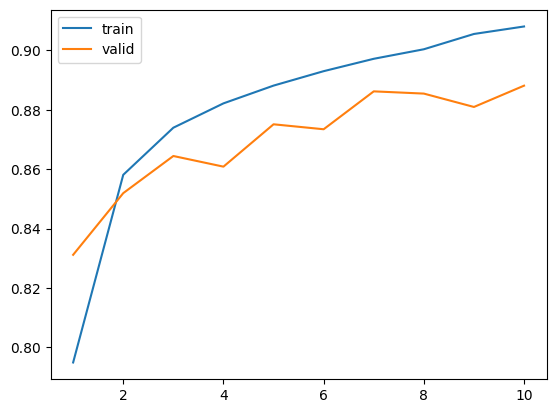

In [24]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [34]:
# Alumno: Tome el modelo anterior y agregue regularización

model = Sequential()

# ensaya con --> 0.2, 0.5 y 0.8
dropout_rate = 0.5

model.add(Dense(units=128, activation='relu', input_shape=(in_shape,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=dropout_rate))
model.add(Dense(units=out_shape, activation='softmax'))

model.compile(optimizer="Adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


# Seleccione el dropout_ratev que mejor le funcione

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               100480    
                                                                 
 dense_26 (Dense)            (None, 128)               16512     
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)               

In [35]:
history = model.fit(X_train, y_train, validation_split=0.2 , epochs=10, batch_size=128)

Epoch 1/10
375/375 [==============================] - 4s 5ms/step - loss: 1.2044 - accuracy: 0.5515 - val_loss: 0.5946 - val_accuracy: 0.7825
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6838 - accuracy: 0.7581 - val_loss: 0.4782 - val_accuracy: 0.8272
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.5724 - accuracy: 0.8065 - val_loss: 0.4438 - val_accuracy: 0.8457
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.5231 - accuracy: 0.8277 - val_loss: 0.4230 - val_accuracy: 0.8480
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.4835 - accuracy: 0.8408 - val_loss: 0.4306 - val_accuracy: 0.8503
Epoch 6/10
375/375 [==============================] - 2s 5ms/step - loss: 0.4558 - accuracy: 0.8493 - val_loss: 0.4024 - val_accuracy: 0.8587
Epoch 7/10
375/375 [==============================] - 2s 6ms/step - loss: 0.4382 - accuracy: 0.8569 - val_loss: 0.3812 - val_accuracy: 0.8686
Epoch 

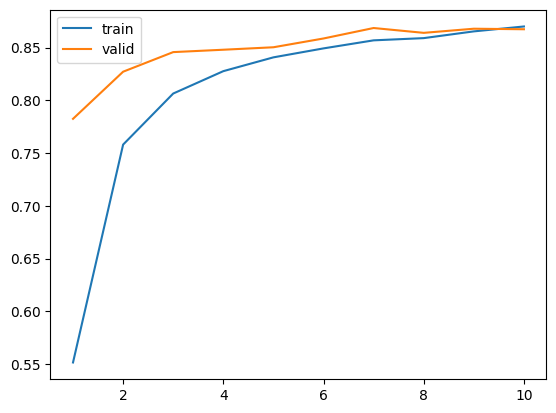

In [36]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [43]:
# Alumno: Predecir las probabilidades del dataset X_test
y_hat_prob = model.predict(X_test)
y_hat_prob[:10]

313/313 [==============================] - 1s 2ms/step


array([[5.8257842e-13, 1.8203048e-12, 3.7410010e-14, 3.0610321e-13,
        2.4041099e-15, 8.2635132e-05, 5.7742675e-16, 1.6732983e-02,
        1.5404959e-10, 9.8318440e-01],
       [8.6969834e-05, 2.2883207e-06, 9.5089507e-01, 8.0945547e-06,
        1.2279840e-02, 3.4708576e-09, 3.6711343e-02, 6.3380474e-09,
        1.6456814e-05, 4.3276831e-09],
       [4.3885284e-27, 1.0000000e+00, 2.4349590e-24, 2.1019853e-14,
        2.5097747e-22, 0.0000000e+00, 1.6709255e-31, 3.9061121e-35,
        0.0000000e+00, 1.1539951e-31],
       [3.3260532e-22, 1.0000000e+00, 3.9933921e-20, 1.0861340e-11,
        2.3140498e-18, 2.1019981e-32, 8.0020571e-26, 2.2545420e-29,
        3.6884462e-32, 2.2489879e-26],
       [6.8464473e-02, 3.4682937e-05, 3.1793069e-02, 9.1021778e-03,
        2.8014438e-02, 1.8487785e-06, 8.6175513e-01, 6.3394560e-07,
        8.3262194e-04, 8.8082140e-07],
       [7.3688139e-16, 1.0000000e+00, 1.5754137e-14, 1.5249862e-08,
        3.6294554e-13, 3.4621363e-23, 1.6535308e-18, 4.67

In [42]:
# Alumno: Transformar las probabilidades en y_hat usando argmax
y_hat = np.argmax(y_hat_prob,axis=1)
y_hat[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

# Validar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline5.png" width="1000" align="middle">

In [44]:
# Alumno: Utilizar evaluate para calcular la exactitud (accuracy)

scores = model.evaluate(X_test, y_test)
scores[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.4101 - accuracy: 0.8626


0.8626000285148621

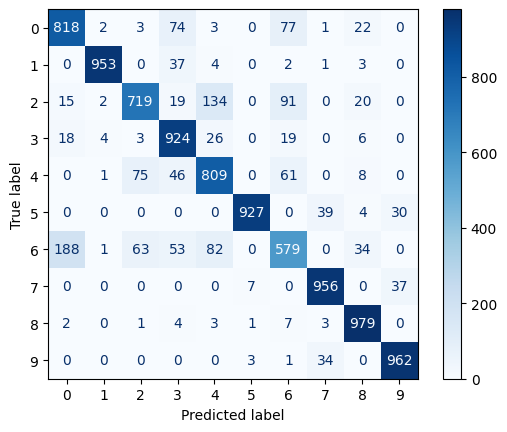

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=list(range(10)))
cmd.plot(cmap=plt.cm.Blues)
plt.show()

Se puede observar que hay muy malas predicciones en los sacos y vestidos

# Utilizar modelo
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline6.png" width="1000" align="middle">

Se utiliza el ranking de los peores 10 sacos clasificados para evaluar

In [46]:
rank_saco = [4166, 4641, 6513, 324, 9292, 4646, 3290, 5255, 5919, 1329]

In [47]:
# Alumno: Obtener los vectores para evaluar los sacos indicados
# Utilizar como máscara rank_saco


X_test_peores_sacos = X_test[rank_saco]

y_test_peores_sacos = y_test[rank_saco]

In [49]:
# Alumno: Calcular la exactitud de los sacos seleccionados

score = model.evaluate(X_test_peores_sacos, y_test_peores_sacos)
score[1]

1/1 [==============================] - 0s 25ms/step - loss: 2.2055 - accuracy: 0.2000


0.20000000298023224

In [53]:
# Alumno: Realizar la prediccion con los X_test de los sacos
# y calcular los y_hat de esos sacos (lo que el sistema ve)

y_hat_prob_peores_sacos = model.predict(X_test_peores_sacos)

y_hat_peores = np.argmax(y_hat_prob_peores_sacos,axis=1)

print(y_hat_peores)
print("solo se categorizaron correctamente 2 de los sacos, con razón son los peores >=(")

1/1 [==============================] - 0s 20ms/step
[2 2 2 6 4 2 4 2 2 2]
solo se categorizaron correctamente 2 de los sacos, con razon son los peores >=(


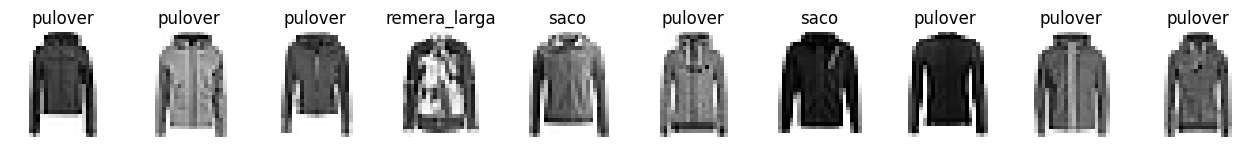

In [55]:
# Alumno: Dibujar las imagenes del dataset X_test correspondiente
# a los IDs de los sacos especificados y colocar arriba de cada imagen
# lo que el modelo predijo
# Utilizar "category_list" para transformar el número a la categoría

fig = plt.figure(figsize=(16,9))
j = 0

for i in rank_saco:
    ax = fig.add_subplot(1, 10, j+1)
    ax.axis('off')
    ax.imshow(X_test_norm[i], cmap='Greys')
    ax.set_title(category_list[y_hat_peores[j]])
    j += 1

plt.show()

# Conclusión
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline7.png" width="1000" align="middle">

Al utilizar deep larning no es posible diferenciar bien entre los sacos y los puloveres, el modelo es incapaz de ver los botones o los cierres que son la clave para diferenciarlos. Una alternativa es probar con redes más aptas para detección de imagenes (las CNN convolucionales, que veremos más adelante)